Download Data

In [11]:
import requests
quakes = requests.get("http://earthquake.usgs.gov/fdsnws/event/1/query.geojson",
                      params={
                          'starttime': "2000-01-01",
                          "maxlatitude": "58.723",
                          "minlatitude": "50.008",
                          "maxlongitude": "1.67",
                          "minlongitude": "-9.756",
                          "minmagnitude": "1",
                          "endtime": "2018-10-11",
                          "orderby": "time-asc"}
                      )
print(quakes.text[0:200])
print(type(quakes.text))


{"type":"FeatureCollection","metadata":{"generated":1605604015000,"url":"https://earthquake.usgs.gov/fdsnws/event/1/query.geojson?starttime=2000-01-01&maxlatitude=58.723&minlatitude=50.008&maxlongitud
<class 'str'>


Parse the data as JSON (try to save data in txt files)

In [12]:
import json
requests_json = json.loads(quakes.text)
print(type(requests_json))
requests_json

<class 'dict'>


{'type': 'FeatureCollection',
 'metadata': {'generated': 1605604015000,
  'url': 'https://earthquake.usgs.gov/fdsnws/event/1/query.geojson?starttime=2000-01-01&maxlatitude=58.723&minlatitude=50.008&maxlongitude=1.67&minlongitude=-9.756&minmagnitude=1&endtime=2018-10-11&orderby=time-asc',
  'title': 'USGS Earthquakes',
  'status': 200,
  'api': '1.10.3',
  'count': 120},
 'features': [{'type': 'Feature',
   'properties': {'mag': 2.6,
    'place': 'England, United Kingdom',
    'time': 956553055700,
    'updated': 1415322596133,
    'tz': None,
    'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/usp0009rst',
    'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=usp0009rst&format=geojson',
    'felt': None,
    'cdi': None,
    'mmi': None,
    'alert': None,
    'status': 'reviewed',
    'tsunami': 0,
    'sig': 104,
    'net': 'us',
    'code': 'p0009rst',
    'ids': ',usp0009rst,',
    'sources': ',us,',
    'types': ',impact-text,origin,phase-data,',
    'n

In [13]:
requests_json.keys()

dict_keys(['type', 'metadata', 'features', 'bbox'])

In [14]:
len(requests_json['features'])

120

In [15]:
requests_json['features'][0].keys()

dict_keys(['type', 'properties', 'geometry', 'id'])

In [16]:
requests_json['features'][0]['properties'].keys()

dict_keys(['mag', 'place', 'time', 'updated', 'tz', 'url', 'detail', 'felt', 'cdi', 'mmi', 'alert', 'status', 'tsunami', 'sig', 'net', 'code', 'ids', 'sources', 'types', 'nst', 'dmin', 'rms', 'gap', 'magType', 'type', 'title'])

In [17]:
requests_json['features'][0]['properties']['mag']

2.6

In [18]:
requests_json['features'][0]['geometry']

{'type': 'Point', 'coordinates': [-2.81, 54.77, 14]}

Find the largest quake

In [20]:
quakes = requests_json['features']

largest_so_far = quakes[0]
print(largest_so_far)

for quake in quakes:
    if quake['properties']['mag'] > largest_so_far['properties']['mag']:
        largest_so_far = quake
        
largest_so_far['properties']['mag']

{'type': 'Feature', 'properties': {'mag': 2.6, 'place': 'England, United Kingdom', 'time': 956553055700, 'updated': 1415322596133, 'tz': None, 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/usp0009rst', 'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=usp0009rst&format=geojson', 'felt': None, 'cdi': None, 'mmi': None, 'alert': None, 'status': 'reviewed', 'tsunami': 0, 'sig': 104, 'net': 'us', 'code': 'p0009rst', 'ids': ',usp0009rst,', 'sources': ',us,', 'types': ',impact-text,origin,phase-data,', 'nst': None, 'dmin': None, 'rms': None, 'gap': None, 'magType': 'ml', 'type': 'earthquake', 'title': 'M 2.6 - England, United Kingdom'}, 'geometry': {'type': 'Point', 'coordinates': [-2.81, 54.77, 14]}, 'id': 'usp0009rst'}


4.8

In [21]:
lat = largest_so_far['geometry']['coordinates'][1]
long = largest_so_far['geometry']['coordinates'][0]
print("Latitude: {} Longitude: {}".format(lat, long))

Latitude: 52.52 Longitude: -2.15


Get a map at the point of the quake

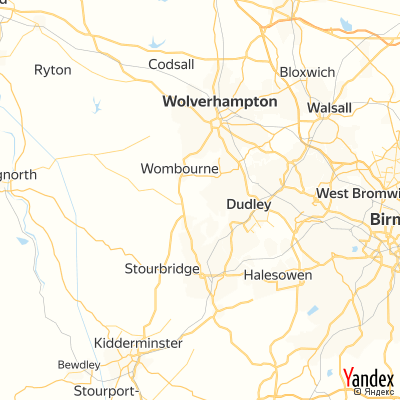

In [23]:
import requests


def request_map_at(lat, long, satellite=True,
                   zoom=10, size=(400, 400)):
    base = "https://static-maps.yandex.ru/1.x/?"

    params = dict(
        z=zoom,
        size="{},{}".format(size[0], size[1]),
        ll="{},{}".format(long, lat),
        l="sat" if satellite else "map",
        lang="en_US"
    )

    return requests.get(base, params=params)

map_png = request_map_at(lat, long, zoom=10, satellite=False)
from IPython.display import Image
Image(map_png.content)